<a href="https://colab.research.google.com/github/Tommy840602/LightGBM/blob/main/%20lightGBM_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.impute import SimpleImputer

In [136]:
#EDA
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [137]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
566,567,60,RL,77.0,11198,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,245.0,Gd,TA,PConc,Gd,Gd,No,Unf,0,Unf,0,1122,1122,GasA,Ex,Y,SBrkr,1134,1370,0,2504,0,0,2,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,656,TA,TA,Y,144,39,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,325000
364,365,60,RL,NaN,18800,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,120.0,TA,TA,PConc,Gd,TA,Mn,GLQ,712,Unf,0,84,796,GasA,TA,Y,SBrkr,790,784,0,1574,1,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1976.0,Fin,2,566,TA,TA,Y,306,111,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,190000
645,646,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1971,1971,Hip,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,282,LwQ,35,664,981,GasA,TA,Y,SBrkr,981,0,0,981,1,0,1,1,3,1,TA,5,Typ,0,NaN,Detchd,1979.0,Unf,2,576,TA,TA,Y,0,312,40,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250
968,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,600,600,Grav,Fa,N,SBrkr,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
817,818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,CemntBd,CmentBd,BrkFace,148.0,Gd,TA,PConc,Gd,TA,No,GLQ,1218,Unf,0,350,1568,GasA,Ex,Y,SBrkr,1689,0,0,1689,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,2002.0,RFn,3,857,TA,TA,Y,150,59,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,271000


In [138]:
test_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
868,2329,60,RL,58.0,9487,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,520.0,Unf,0.0,395.0,915.0,GasA,Ex,Y,SBrkr,940,750,0,1690,1.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2000.0,RFn,2.0,442.0,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1303,2764,20,RL,86.0,11650,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,7,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkCmn,58.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,FuseA,1472,0,0,1472,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,1959.0,Unf,2.0,484.0,TA,TA,Y,0,68,0,0,227,0,NaN,NaN,NaN,0,6,2006,WD,Normal
739,2200,70,RL,66.0,8969,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,6,1926,1950,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,379.0,Unf,0.0,265.0,644.0,GasA,Ex,Y,SBrkr,672,644,0,1316,1.0,0.0,1,0,2,1,TA,6,Typ,1,Gd,Detchd,2001.0,Unf,1.0,369.0,TA,TA,P,0,0,0,0,192,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal
669,2130,70,RM,60.0,10266,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,6,6,1952,1952,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,372.0,Unf,0.0,396.0,768.0,GasA,TA,Y,FuseA,768,768,0,1536,0.0,0.0,1,1,4,1,TA,7,Typ,0,NaN,Detchd,1952.0,Unf,1.0,308.0,TA,TA,Y,0,216,80,0,0,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml
539,2000,60,RL,NaN,11929,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,466.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1242.0,1242.0,GasA,Ex,Y,SBrkr,1251,1250,0,2501,0.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1995.0,RFn,3.0,751.0,TA,TA,Y,192,87,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal


In [139]:
print("train.shape: %s, test.shape: %s" % (train_df.shape,test_df.shape))

train.shape: (1460, 81), test.shape: (1459, 80)


In [140]:
pd.options.display.max_columns = None
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [141]:
#Missing Data
nan_df = (train_df.isnull().sum() / len(train_df)) * 100
nan_df= nan_df.drop(nan_df[nan_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :nan_df})
missing_data.head(10)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


<Axes: xlabel='SalePrice', ylabel='Density'>

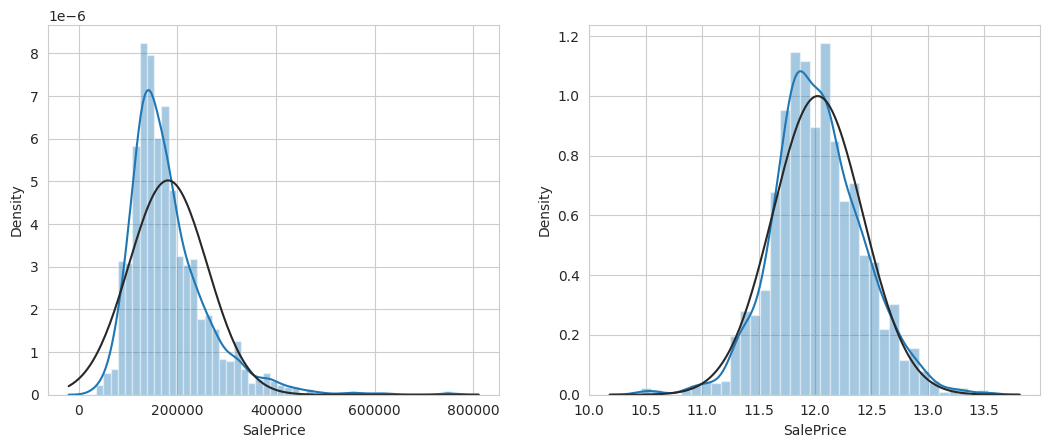

In [142]:
#Target analysis
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(train_df['SalePrice'], ax=ax[0], fit=norm)
sns.distplot(np.log(train_df[('SalePrice')]+1), ax=ax[1], fit= norm)

In [143]:
#Data Engineering
def fill_missing(df, cols, val):
    for col in cols:
        df[col] = df[col].fillna(val)

def fill_missing_with_mode(df, cols):
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])

def addlogs(res, cols):
    m = res.shape[1]
    for c in cols:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[c])).values)
        res.columns.values[m] = c + '_log'
        m += 1
    return res

In [144]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

In [145]:
loglist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

train_df = addlogs(train_df,loglist)

In [146]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

In [147]:
fill_missing(train_df,["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"MasVnrType", "MSSubClass"],"None")
fill_missing(train_df,["GarageYrBlt", "GarageArea", "GarageCars",'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',"MasVnrArea"], 0)
fill_missing_with_mode(train_df, ["MSZoning", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"])
fill_missing(train_df,["Functional"],"Typ")
train_df.drop(['Utilities'], axis=1, inplace=True)
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [148]:
train_df.drop(train_df[(train_df['OverallQual']<5) & (train_df['SalePrice']>200000)].index, inplace=True)
train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index, inplace=True)
train_df.reset_index(drop=True, inplace=True)

In [149]:
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)
train_df['YrSold'] = train_df['YrSold'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)

In [150]:
#Handle categoricals
def fix_missing_cols(in_train, in_test):
    missing_cols = set(in_train.columns) - set(in_test.columns)
    for c in missing_cols:
        in_test[c] = 0
    in_test = in_test[in_train.columns]
    return in_test

def dummy_encode(in_df_train, in_df_test):
    train_df = in_df_train
    test_df = in_df_test
    categorical_feats = [
        f for f in train_df.columns if train_df[f].dtype == 'object'
    ]
    print(categorical_feats)
    for f_ in categorical_feats:
        prefix = f_
        train_df = pd.concat([train_df, pd.get_dummies(train_df[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        test_df = pd.concat([test_df, pd.get_dummies(test_df[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        test_df = fix_missing_cols(train_df,test_df)
    return train_df, test_df

In [151]:
train_df,test_df = dummy_encode(train_df,test_df)
print("Shape train: %s, test: %s" % (train_df.shape,test_df.shape))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Shape train: (1456, 361), test: (1459, 361)


In [152]:
#Additional Feature Engineering
def load_poly_features(train_df,test_df,cols):
    print('Loading polynomial features..')
    poly_features = train_df[cols]
    poly_features_test =test_df[cols]

    imputer = SimpleImputer(strategy='median')

    poly_features = imputer.fit_transform(poly_features)
    poly_features_test = imputer.transform(poly_features_test)

    poly_transformer = PolynomialFeatures(degree=3)
    poly_transformer.fit(poly_features)

    poly_features = poly_transformer.transform(poly_features)
    poly_features_test = poly_transformer.transform(poly_features_test)
    print('Polynomial Features shape: %s' % str(poly_features.shape))

    df_poly_features = pd.DataFrame(poly_features,columns=poly_transformer.get_feature_names_out(cols))
    df_poly_features_test = pd.DataFrame(poly_features_test,columns=poly_transformer.get_feature_names_out(cols))
    df_poly_features['Id'] = train_df['Id']
    df_poly_features_test['Id'] = test_df['Id']
    print('Loaded polynomial features')
    return df_poly_features, df_poly_features_test

In [153]:
correlated_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
train_poly_df,test_poly_df =  load_poly_features(train_df,test_df,cols=correlated_cols)
print("train.shape: %s, test.shape: %s" % (train_poly_df.shape,test_poly_df.shape))

Loading polynomial features..
Polynomial Features shape: (1456, 84)
Loaded polynomial features
train.shape: (1456, 85), test.shape: (1459, 85)


In [154]:
train_df = train_df.merge(right=train_poly_df.reset_index(), how='left', on='Id')
test_df = test_df.merge(right=test_poly_df.reset_index(), how='left', on='Id')

In [155]:
print("train.shape: %s, test.shape: %s" % (train_df.shape,test_df.shape))

train.shape: (1456, 446), test.shape: (1459, 446)


In [156]:
#LightGBM Model
y = train_df["SalePrice"]
y.sample(3)

631    11.320566
355    12.086732
996    11.418626
Name: SalePrice, dtype: float64

In [157]:
train_df.drop(["SalePrice"], axis=1, inplace=True)
test_df.drop(["SalePrice"], axis=1, inplace=True)

In [158]:
print("train.shape: %s, test.shape: %s" % (train_df.shape,test_df.shape))

train.shape: (1456, 445), test.shape: (1459, 445)


In [159]:
X_train, X_test, y_train, y_test = train_test_split( train_df, y, test_size=0.2, random_state=42)

In [160]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,
    "max_bin": 512,
    "num_iterations": 100000
}

In [161]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [162]:
from lightgbm import early_stopping
callbacks=[early_stopping(stopping_rounds=1000)]
gbm.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric='l1',callbacks=callbacks)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [163]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


In [164]:
print('The RMSE of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

The RMSE of prediction is: 0.00315


In [165]:
#Results
test_pred = np.expm1(gbm.predict(test_df,num_iteration=gbm.best_iteration_))
test_df["SalePrice"] = test_pred
test_df.to_csv("submission.csv", columns=["Id", "SalePrice"], index=False)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
